# Day 12 – Data Cleaning & Preprocessing in ETL
### Handling Missing Values, Duplicates & Outliers

In this notebook, we'll explore:
- Simulating a dirty dataset
- Detecting and handling missing values
- Removing duplicates
- Detecting and fixing outliers programmatically
- Preparing a clean dataset ready for analytics or ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')

# -------------------------------
# 1. Simulate a dirty dataset
# -------------------------------
np.random.seed(42)
n = 200

data = {
    'CustomerID': np.random.randint(1000, 1050, n),  # duplicate IDs
    'Age': np.random.normal(35, 10, n).round(1),
    'Gender': np.random.choice(['Male', 'Female', 'Unknown'], n, p=[0.45, 0.45, 0.1]),
    'PurchaseAmount': np.random.normal(500, 150, n).round(2),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], n)
}
df = pd.DataFrame(data)

# Introduce missing values
for col in ['Age', 'PurchaseAmount']:
    df.loc[df.sample(frac=0.1).index, col] = np.nan

# Introduce extreme outliers
outlier_indices = np.random.choice(df.index, 5, replace=False)
df.loc[outlier_indices, 'PurchaseAmount'] = df['PurchaseAmount'] * 8

# Introduce duplicates
df = pd.concat([df, df.sample(10, random_state=1)], ignore_index=True)

# Quick preview
df.head(10)

,CustomerID,Age,Gender,PurchaseAmount,Region
0,1038,NaN,Unknown,554.99,East
1,1028,39.0,Male,359.02,West
2,1014,53.9,Male,422.92,South
3,1042,36.7,Female,341.12,North
4,1007,37.6,Male,490.60,West
5,1020,NaN,Unknown,643.27,North
6,1038,15.8,Female,352.14,North
7,1018,34.7,Male,NaN,North
8,1022,35.6,Female,420.46,East
9,1010,59.6,Female,381.07,East


## 1. Data Overview

In [2]:
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      210 non-null    int32  
 1   Age             188 non-null    float64
 2   Gender          210 non-null    object 
 3   PurchaseAmount  190 non-null    float64
 4   Region          210 non-null    object 
dtypes: float64(2), int32(1), object(2)
memory usage: 7.5+ KB


CustomerID         0
Age               22
Gender             0
PurchaseAmount    20
Region             0
dtype: int64

## 2. Detecting Missing Values

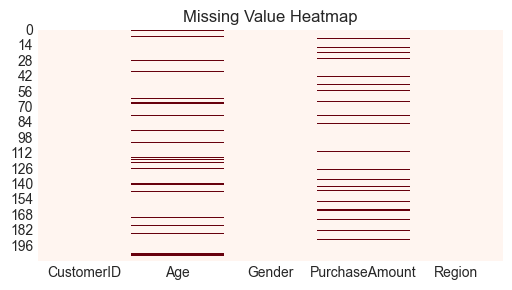

C:\Users\vedav\AppData\Local\Temp\ipykernel_19196\230823561.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\vedav\AppData\Local\Temp\ipykernel_19196\230823561.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [3]:
plt.figure(figsize=(6,3))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Missing Value Heatmap')
plt.show()

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['PurchaseAmount'].fillna(df['PurchaseAmount'].mean(), inplace=True)

## 3. Removing Duplicates

In [4]:
duplicates_before = df.duplicated().sum()
print(f"Duplicates before cleaning: {duplicates_before}")

df.drop_duplicates(inplace=True)
duplicates_after = df.duplicated().sum()
print(f"Duplicates after cleaning: {duplicates_after}")

Duplicates before cleaning: 10
Duplicates after cleaning: 0


## 4. Detecting Outliers (Z-Score & IQR)

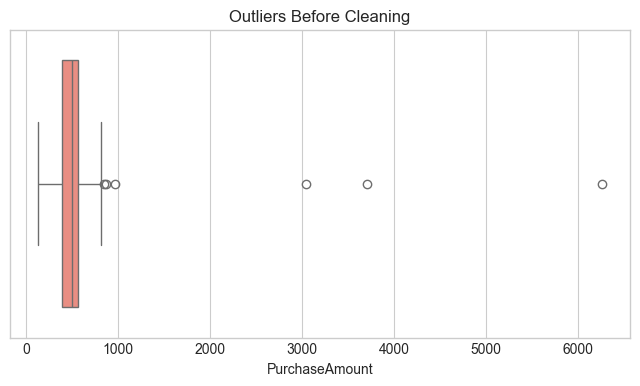

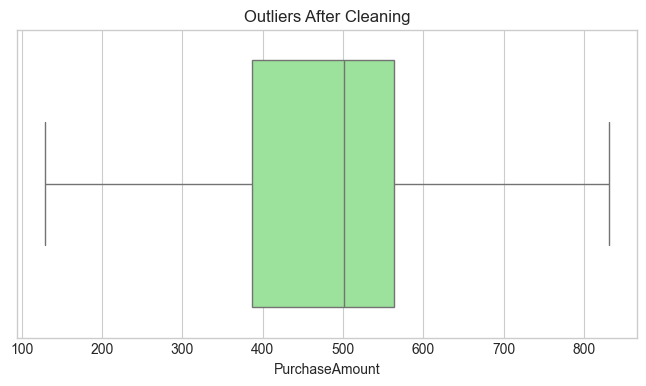

In [5]:
# Boxplot before cleaning
plt.figure(figsize=(8,4))
sns.boxplot(x=df['PurchaseAmount'], color='salmon')
plt.title('Outliers Before Cleaning')
plt.show()

# Using IQR method to remove extreme outliers
Q1 = df['PurchaseAmount'].quantile(0.25)
Q3 = df['PurchaseAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['PurchaseAmount'] = np.where(df['PurchaseAmount'] > upper_bound, upper_bound, df['PurchaseAmount'])
df['PurchaseAmount'] = np.where(df['PurchaseAmount'] < lower_bound, lower_bound, df['PurchaseAmount'])

# Boxplot after cleaning
plt.figure(figsize=(8,4))
sns.boxplot(x=df['PurchaseAmount'], color='lightgreen')
plt.title('Outliers After Cleaning')
plt.show()

## 5. Final Cleaned Dataset Overview

In [6]:
df.describe()
df.isnull().sum()
df.sample(5)

,CustomerID,Age,Gender,PurchaseAmount,Region
70,1017,37.80,Male,575.1400,East
71,1025,43.30,Female,353.3700,East
133,1000,36.90,Female,671.5600,North
177,1043,36.85,Male,701.8100,East
176,1043,36.10,Male,831.0525,South


## 6. Summary & Insights
- Cleaned missing values using **median/mean imputation**
- Removed all duplicate rows
- Detected and fixed outliers using **IQR clipping**
- Dataset is now **ready for feature engineering / model training**

👉 This approach forms the **core preprocessing step in ETL pipelines** for data analytics & ML systems.